<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(_0_8)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.8_n250.csv',
 'data_add_delta_-0.8_n120.csv',
 'data_add_delta_-0.8_n60.csv',
 'data_add_delta_-0.8_n30.csv',
 'data_add_delta_-0.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.8_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,90.428705,96.344997,42.663136,41.376702,0.161616,280.975156,280.846872,0.128284
1,0.0,1.0,32.074454,84.219731,95.747071,71.006380,-0.137200,292.910436,292.970478,-0.060042
2,0.0,2.0,47.093330,29.354662,20.127244,93.835749,-0.321419,200.089565,200.445424,-0.355858
3,0.0,3.0,94.862495,45.162043,43.671046,90.665697,0.095468,284.456749,284.353400,0.103349
4,0.0,4.0,44.252972,63.507987,53.375045,68.022518,-0.564563,238.593958,239.153238,-0.559280
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,78.213842,65.659752,64.666674,56.732320,-0.118320,275.154269,275.206041,-0.051772
59996,999.0,56.0,81.332551,90.522604,60.333598,22.877313,0.079187,265.145252,264.984527,0.160726
59997,999.0,57.0,43.811799,70.183444,29.118894,44.423861,-0.337889,197.200110,197.578961,-0.378851
59998,999.0,58.0,86.731232,89.543523,63.006036,53.524963,0.119658,302.925413,302.704575,0.220838


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,90.428705,96.344997,42.663136,41.376702,0.161616,280.975156,280.846872,0.128284
1,0.0,1.0,32.074454,84.219731,95.747071,71.006380,-0.137200,292.910436,292.970478,-0.060042
2,0.0,2.0,47.093330,29.354662,20.127244,93.835749,-0.321419,200.089565,200.445424,-0.355858
3,0.0,3.0,94.862495,45.162043,43.671046,90.665697,0.095468,284.456749,284.353400,0.103349
4,0.0,4.0,44.252972,63.507987,53.375045,68.022518,-0.564563,238.593958,239.153238,-0.559280
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,78.213842,65.659752,64.666674,56.732320,-0.118320,275.154269,275.206041,-0.051772
59996,999.0,56.0,81.332551,90.522604,60.333598,22.877313,0.079187,265.145252,264.984527,0.160726
59997,999.0,57.0,43.811799,70.183444,29.118894,44.423861,-0.337889,197.200110,197.578961,-0.378851
59998,999.0,58.0,86.731232,89.543523,63.006036,53.524963,0.119658,302.925413,302.704575,0.220838


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    90.428705  96.344997  42.663136  41.376702  0.161616  280.975156   
      1.0    32.074454  84.219731  95.747071  71.006380 -0.137200  292.910436   
      2.0    47.093330  29.354662  20.127244  93.835749 -0.321419  200.089565   
      3.0    94.862495  45.162043  43.671046  90.665697  0.095468  284.456749   
      4.0    44.252972  63.507987  53.375045  68.022518 -0.564563  238.593958   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   78.213842  65.659752  64.666674  56.732320 -0.118320  275.154269   
      56.0   81.332551  90.522604  60.333598  22.877313  0.079187  265.145252   
      57.0   43.811799  70.183444  29.118894  44.423861 -0.337889  197.200110   
      58.0   86.731232  89.543523  63.006036  53.524963  0.119658  302.925413   
      59.0   49.314189  74.177322  43.476947  31.558798  0.089393  208.616650   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    280.846872  0.128284  
      1.0    292.970478 -0.060042  
      2.0    200.445424 -0.355858  
      3.0    284.353400  0.103349  
      4.0    239.153238 -0.559280  
...                 ...       ...  
999.0 55.0   275.206041 -0.051772  
      56.0   264.984527  0.160726  
      57.0   197.578961 -0.378851  
      58.0   302.704575  0.220838  
      59.0   208.544847  0.071804  

[60000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    90.428705  96.344997  42.663136  41.376702  0.161616  280.975156   
      1.0    32.074454  84.219731  95.747071  71.006380 -0.137200  292.910436   
      2.0    47.093330  29.354662  20.127244  93.835749 -0.321419  200.089565   
      3.0    94.862495  45.162043  43.671046  90.665697  0.095468  284.456749   
      4.0    44.252972  63.507987  53.375045  68.022518 -0.564563  238.593958   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   78.213842  65.659752  64.666674  56.732320 -0.118320  275.154269   
      56.0   81.332551  90.522604  60.333598  22.877313  0.079187  265.145252   
      57.0   43.811799  70.183444  29.118894  44.423861 -0.337889  197.200110   
      58.0   86.731232  89.543523  63.006036  53.524963  0.119658  302.925413   
      59.0   49.314189  74.177322  43.476947  31.558798  0.089393  208.616650   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    280.846872  0.128284  
      1.0    292.970478 -0.060042  
      2.0    200.445424 -0.355858  
      3.0    284.353400  0.103349  
      4.0    239.153238 -0.559280  
...                 ...       ...  
999.0 55.0   275.206041 -0.051772  
      56.0   264.984527  0.160726  
      57.0   197.578961 -0.378851  
      58.0   302.704575  0.220838  
      59.0   208.544847  0.071804  

[60000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,90.428705,96.344997,42.663136,41.376702,0.161616,280.975156,280.846872,0.128284
1,0.0,1.0,32.074454,84.219731,95.747071,71.006380,-0.137200,292.910436,292.970478,-0.060042
2,0.0,2.0,47.093330,29.354662,20.127244,93.835749,-0.321419,200.089565,200.445424,-0.355858
3,0.0,3.0,94.862495,45.162043,43.671046,90.665697,0.095468,284.456749,284.353400,0.103349
4,0.0,4.0,44.252972,63.507987,53.375045,68.022518,-0.564563,238.593958,239.153238,-0.559280
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,78.213842,65.659752,64.666674,56.732320,-0.118320,275.154269,275.206041,-0.051772
59996,999.0,56.0,81.332551,90.522604,60.333598,22.877313,0.079187,265.145252,264.984527,0.160726
59997,999.0,57.0,43.811799,70.183444,29.118894,44.423861,-0.337889,197.200110,197.578961,-0.378851
59998,999.0,58.0,86.731232,89.543523,63.006036,53.524963,0.119658,302.925413,302.704575,0.220838


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    90.428705  96.344997  42.663136  41.376702  0.161616  280.975156   
      1.0    32.074454  84.219731  95.747071  71.006380 -0.137200  292.910436   
      2.0    47.093330  29.354662  20.127244  93.835749 -0.321419  200.089565   
      3.0    94.862495  45.162043  43.671046  90.665697  0.095468  284.456749   
      4.0    44.252972  63.507987  53.375045  68.022518 -0.564563  238.593958   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   78.213842  65.659752  64.666674  56.732320 -0.118320  275.154269   
      56.0   81.332551  90.522604  60.333598  22.877313  0.079187  265.145252   
      57.0   43.811799  70.183444  29.118894  44.423861 -0.337889  197.200110   
      58.0   86.731232  89.543523  63.006036  53.524963  0.119658  302.925413   
      59.0   49.314189  74.177322  43.476947  31.558798  0.089393  208.616650   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    280.846872  0.128284  
      1.0    292.970478 -0.060042  
      2.0    200.445424 -0.355858  
      3.0    284.353400  0.103349  
      4.0    239.153238 -0.559280  
...                 ...       ...  
999.0 55.0   275.206041 -0.051772  
      56.0   264.984527  0.160726  
      57.0   197.578961 -0.378851  
      58.0   302.704575  0.220838  
      59.0   208.544847  0.071804  

[60000 rows x 8 columns]

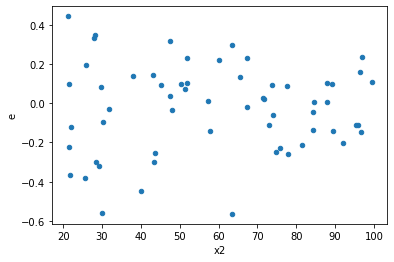

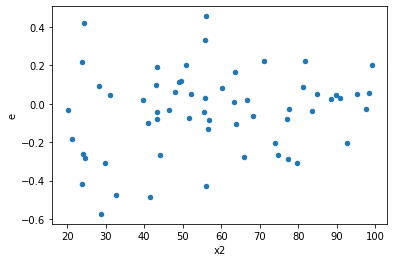

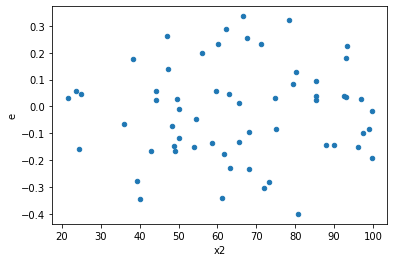

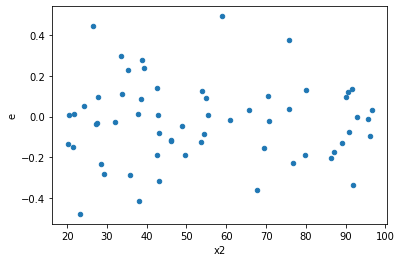

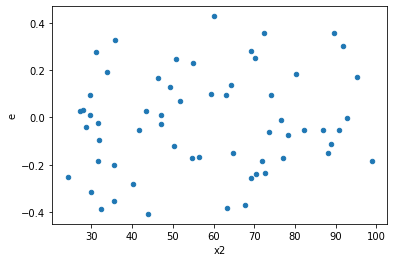

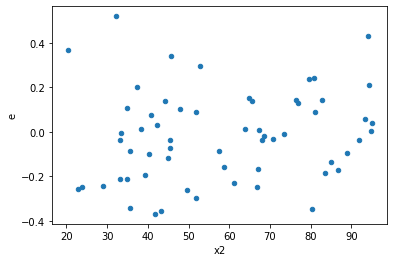

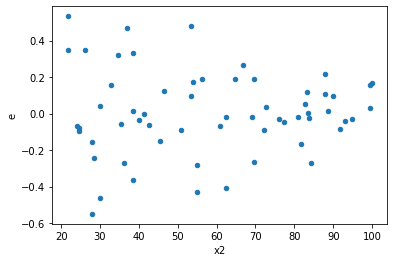

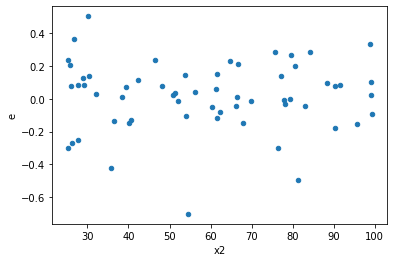

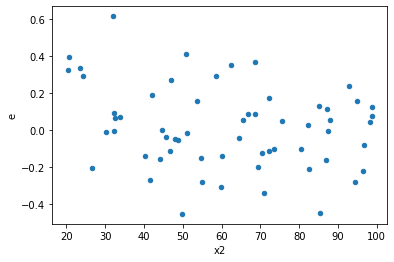

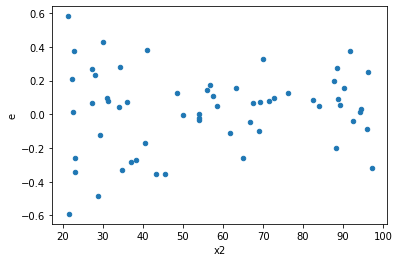

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,20.0,20.0,0.5018840070591455,0.7416410016816374,0.025094200352957275,0.03708205008408187,1.4777139563130914,0.38998066957409616,0.8050096652129519,0.19499033478704808,Reject005=1 : Homoscedasticity
4.0,20.0,20.0,0.8498964160882123,1.148359266888346,0.04249482080441062,0.0574179633444173,1.3511755611040908,0.5070668126100868,0.7464665936949566,0.2535334063050434,Reject005=1 : Homoscedasticity
7.0,20.0,20.0,0.6551552992097925,1.0680374714929026,0.03275776496048963,0.05340187357464513,1.630205041127047,0.28283203245960764,0.8585839837701962,0.14141601622980382,Reject005=1 : Homoscedasticity
10.0,20.0,20.0,0.8569812230421027,0.9499875629671073,0.042849061152105135,0.047499378148355365,1.1085278620164531,0.8200519682384333,0.5899740158807834,0.41002598411921665,Reject005=1 : Homoscedasticity
12.0,20.0,20.0,0.8099911869465688,1.040423052034434,0.04049955934732844,0.0520211526017217,1.28448687936535,0.5808394755536423,0.7095802622231788,0.2904197377768212,Reject005=1 : Homoscedasticity
13.0,20.0,20.0,0.7526373055672322,1.4100935366679563,0.03763186527836161,0.07050467683339781,1.8735365975584028,0.16899609737823673,0.9155019513108816,0.08449804868911837,Reject005=1 : Homoscedasticity
16.0,20.0,20.0,0.8040757844997417,1.0913036211485918,0.04020378922498709,0.05456518105742959,1.3572148822110714,0.500816955496107,0.7495915222519465,0.2504084777480535,Reject005=1 : Homoscedasticity
20.0,20.0,20.0,0.6837326550244658,0.754359399922632,0.034186632751223286,0.0377179699961316,1.1032958487197588,0.8281792951212084,0.5859103524393958,0.4140896475606042,Reject005=1 : Homoscedasticity
25.0,20.0,20.0,0.48892980758916843,1.109761673159646,0.02444649037945842,0.0554880836579823,2.269777084427919,0.07410013671500937,0.9629499316424953,0.037050068357504684,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,20.0,20.0,0.9775409850616611,0.8561897194340105,0.04887704925308305,0.04280948597170052,0.8758606877030367,0.7698271941293869,Reject005=1 : Homoscedasticity
1.0,20.0,20.0,1.1028348089923772,0.7204607885456566,0.05514174044961886,0.036023039427282834,0.6532807839135195,0.34890710628840604,Reject005=1 : Homoscedasticity
2.0,20.0,20.0,0.5018840070591455,0.7416410016816374,0.025094200352957275,0.03708205008408187,1.4777139563130914,0.38998066957409616,Reject005=1 : Homoscedasticity
3.0,20.0,20.0,0.8215837703497008,0.806371306533073,0.04107918851748504,0.04031856532665365,0.9814839772088576,0.9670790759873257,Reject005=1 : Homoscedasticity
4.0,20.0,20.0,0.8498964160882123,1.148359266888346,0.04249482080441062,0.0574179633444173,1.3511755611040908,0.5070668126100868,Reject005=1 : Homoscedasticity
5.0,20.0,20.0,1.0930993119659682,0.8633557404923882,0.05465496559829841,0.04316778702461941,0.7898236976653291,0.6027538683435241,Reject005=1 : Homoscedasticity
6.0,20.0,20.0,1.2913610155999522,0.6807020442890839,0.06456805077999761,0.034035102214454195,0.5271198650617753,0.16080201384253148,Reject005=1 : Homoscedasticity
7.0,20.0,20.0,0.6551552992097925,1.0680374714929026,0.03275776496048963,0.05340187357464513,1.630205041127047,0.28283203245960764,Reject005=1 : Homoscedasticity
8.0,20.0,20.0,1.0299345667613904,0.8079770823500229,0.05149672833806952,0.040398854117501146,0.7844936061236312,0.5924113261435777,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      881
Reject005=0 : Heteroscedasticity    119
Name: Result_test, dtype: int64